In [1]:
import sys#only needed to determine python version number
import os #required to set current working directory
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#While displaying data ,ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:\\Users\\HP\\Desktop\\tcsioninternship\\HRDataset_v14.csv')

In [3]:
#Basic data information
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [4]:
# Find duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

# first look for duplicate records
df[df.duplicated()]
#No duplicates found

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


In [5]:
# Now look for missing salary
df[df['Salary']<=0]
#There is no missing salary

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


In [6]:
# Now look for any null values
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [7]:
#Observation:
#DateofTermination has 207 null values. That means those are currently employed. Keep the column for now and we will use it for experience calculation.
#ManagerID has 8 null values. This column doesn't have any significance in our salary prediction. So keep it as it is now and will be excepted during salary prediction.

In [8]:
# Now set proper format for date fields (DOB, DateofHire, DateofTermination and LastPerformanceReview_Date)

# First check the raw data
df[['DOB','DateofHire','DateofTermination','LastPerformanceReview_Date']].head(5)

,DOB,DateofHire,DateofTermination,LastPerformanceReview_Date
0,07/10/83,7/5/2011,NaN,1/17/2019
1,05/05/75,3/30/2015,6/16/2016,2/24/2016
2,09/19/88,7/5/2011,9/24/2012,5/15/2012
3,09/27/88,1/7/2008,NaN,1/3/2019
4,09/08/89,7/11/2011,9/6/2016,2/1/2016


In [9]:
# Now convert these to datetime

df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'])
df['DOB'] = pd.to_datetime(df['DOB'])

# Verify and confirm
df[['DOB','DateofHire','DateofTermination','LastPerformanceReview_Date']].head(5)

,DOB,DateofHire,DateofTermination,LastPerformanceReview_Date
0,1983-07-10,2011-07-05,NaT,2019-01-17
1,1975-05-05,2015-03-30,2016-06-16,2016-02-24
2,1988-09-19,2011-07-05,2012-09-24,2012-05-15
3,1988-09-27,2008-01-07,NaT,2019-01-03
4,1989-09-08,2011-07-11,2016-09-06,2016-02-01


<AxesSubplot:>

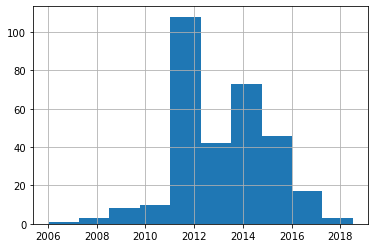

In [10]:
# To ensure data perfection, check histogram of the converted data
df['DateofHire'].hist()

<AxesSubplot:>

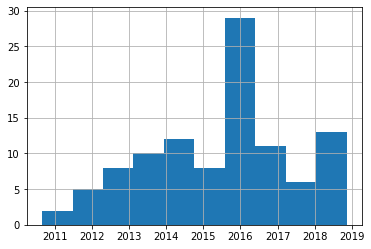

In [11]:
df['DateofTermination'].hist()

<AxesSubplot:>

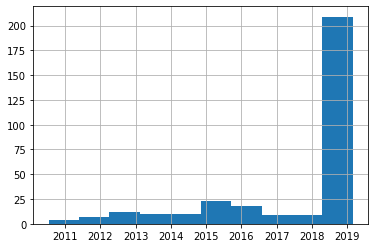

In [12]:
df['LastPerformanceReview_Date'].hist()

<AxesSubplot:>

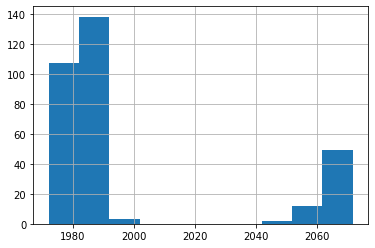

In [13]:
df['DOB'].hist()
#Seems all data is fine except DOB. This is due to data entered in the dataset as dd/mm/yy format instead of dd/mm/yyyy format.

In [14]:
# To correcct this data, deduct 100 years from the DOB for the birth year greaer than current year

df['DOB'] = np.where(df['DOB'] > '2000-01-01', df['DOB'] - pd.DateOffset(years=100), df['DOB'])

<AxesSubplot:>

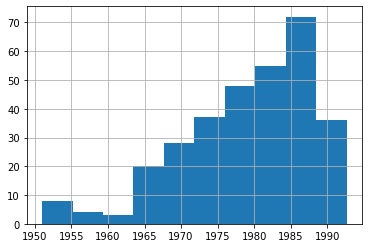

In [15]:
df['DOB'].hist()

In [16]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2


In [17]:
# Remove extra space from string values
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2


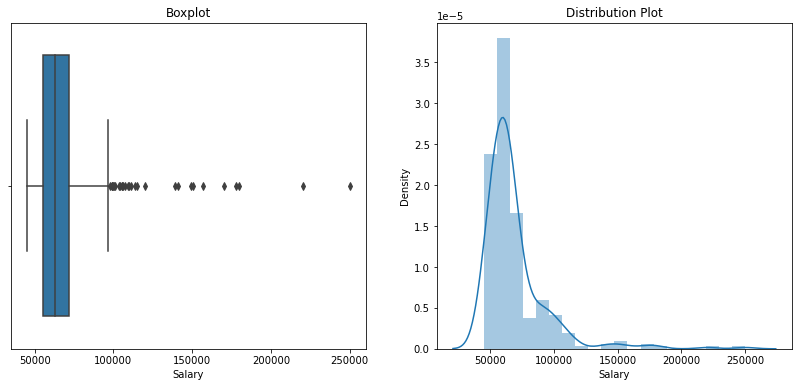

In [18]:
# Visualize the target variable - Salary
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Boxplot')
sns.boxplot(df.Salary)

plt.subplot(1,2,2)
plt.title('Distribution Plot')
sns.distplot(df.Salary, bins=20)
plt.show()

In [19]:
#### There are outliers in the target column (left panel). Furhter analysis would guide us how to tackle these outliers. There can be many reasons for outliers. It can be incorrectly reported or some unsual data. Right box plot shows that the data is normally distributed.

In [20]:
# Below function to check outliers.
def outlier(df):
    stat=df.describe()
    IQR=stat['75%']-stat['25%']
    upper=stat['75%']+1.5*IQR
    lower=stat['25%']-1.5*IQR
    print('The upper and lower bounds for outliers are {} and {}'.format(upper,lower))

In [21]:
outlier(df.Salary)
#The upper and lower bounds for outliers are 96837.75 and 30699.75

The upper and lower bounds for outliers are 96837.75 and 30699.75


In [22]:
# Get low and up into datasets
outliers_low=df[df.Salary<30699.75]
outliers_up=df[df.Salary>96837.75]

In [23]:
# Outliers below the first quartiles
outliers_low

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


In [24]:
# outliers below the upper bound
outliers_up

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
18,"Becker, Renee",10245,0,0,0,4,3,3,0,110000,...,Simon Roup,4.0,Google Search,Fully Meets,4.50,4,5,2015-01-15,0,8
25,"Booth, Frank",10199,0,0,1,4,3,3,0,103613,...,Simon Roup,4.0,LinkedIn,Fully Meets,3.50,5,7,2016-01-10,0,2
26,"Boutwell, Bonalyn",10081,1,1,0,1,1,3,1,106367,...,Brandon R. LeBlanc,3.0,Diversity Job Fair,Fully Meets,5.00,4,3,2019-02-18,0,4
39,"Carr, Claudia N",10082,0,0,0,2,3,3,0,100031,...,Simon Roup,4.0,LinkedIn,Fully Meets,5.00,5,6,2019-02-18,0,7
42,"Champaigne, Brian",10108,1,1,1,1,3,3,0,110929,...,Jennifer Zamora,5.0,Indeed,Fully Meets,4.50,5,7,2019-01-15,0,8
55,"Corleone, Vito",10019,0,0,1,1,5,4,0,170500,...,Janet King,2.0,Indeed,Exceeds,3.70,5,0,2019-02-04,0,15
66,"Del Bosque, Keyla",10155,0,0,0,1,4,3,0,101199,...,Alex Sweetwater,10.0,CareerBuilder,Fully Meets,3.79,5,5,2019-01-25,0,8
76,"Dougall, Eric",10028,0,0,1,1,3,4,0,138888,...,Jennifer Zamora,5.0,Indeed,Exceeds,4.30,5,5,2019-01-04,0,4
86,"Exantus, Susan",10290,1,1,0,4,4,2,0,99280,...,Alex Sweetwater,10.0,Indeed,Needs Improvement,2.10,5,4,2012-08-10,4,19


In [25]:
outliers_up.shape

(29, 36)

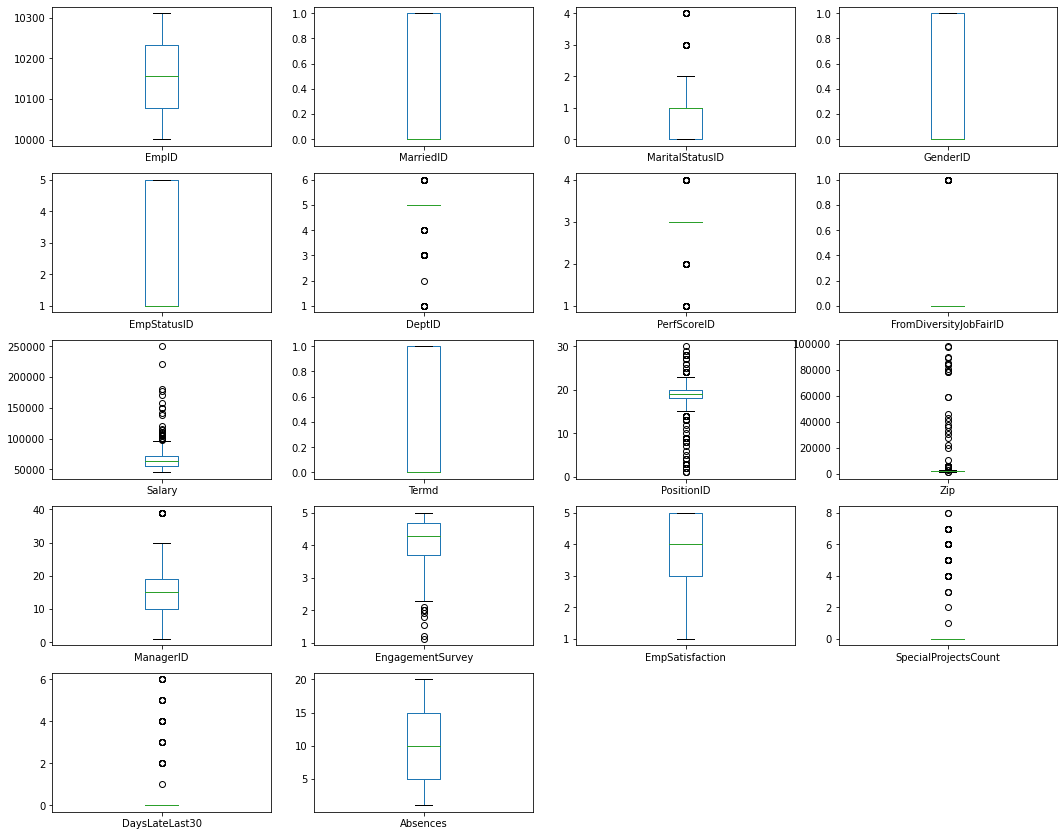

In [26]:
df.plot(kind='box',subplots=True,layout=(8,4),figsize=(18,24));

In [27]:
#When removed outliers from Slary and position columns accuracy decreased.So these outliers are not removed

In [28]:
# Show histogram based on Years of Experience
# We have no Years of Experience column in the dataset, so add a column based on the DateofHire and DateofTermination (if available) 
# using below function. This may not show the full experience of the employee before the current employment, but useful 
from datetime import date
def experienceCalc(doj, dot):
    today = date.today()
    return np.where(pd.isna(dot), today.year - doj.dt.year, dot.dt.year - doj.dt.year)
 
df['YearsOfExperience'] = experienceCalc(df['DateofHire'], df['DateofTermination'])
df[['YearsOfExperience']]

,YearsOfExperience
0,11.0
1,1.0
2,1.0
3,14.0
4,5.0
...,...
306,8.0
307,7.0
308,12.0
309,7.0


In [29]:
df = pd.DataFrame(df)

In [30]:
#LAbel encoding
from sklearn import model_selection, preprocessing
for c in df.columns:
    if df[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))
        #x_train.drop(c,axis=1,inplace=True)
df.head()        

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,YearsOfExperience
0,0,10026,0,0,1,1,5,4,0,62506,...,22.0,5,0,4.60,5,0,2019-01-17,0,1,11.0
1,1,10084,1,1,1,5,3,3,0,104437,...,4.0,4,1,4.96,3,6,2016-02-24,0,17,1.0
2,2,10196,1,1,0,5,5,3,0,64955,...,20.0,5,1,3.02,3,0,2012-05-15,0,3,1.0
3,3,10088,1,1,0,1,5,3,0,64991,...,16.0,4,1,4.84,5,0,2019-01-03,0,15,14.0
4,4,10069,0,2,0,5,5,3,0,50825,...,39.0,3,1,5.00,4,0,2016-02-01,0,2,5.0


In [31]:
#Since there is no high correlation between any of the columns,didn't drop any values

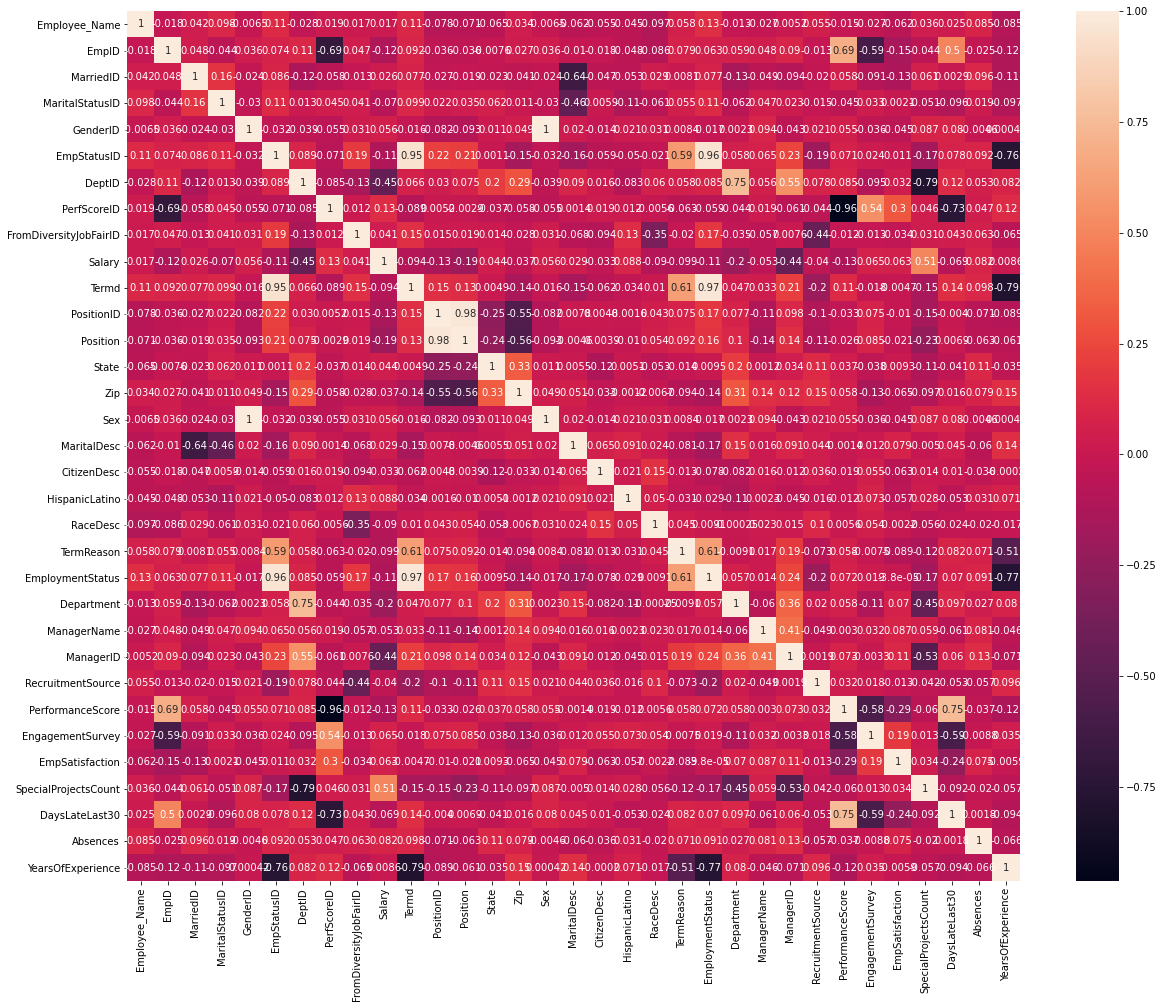

In [32]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [33]:
#converting the categorical variables to numeric variables


In [34]:
#Moved the salary column to another variable
y= df.pop('Salary')

df.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Termd,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,YearsOfExperience
0,0,10026,0,0,1,1,5,4,0,0,...,22.0,5,0,4.60,5,0,2019-01-17,0,1,11.0
1,1,10084,1,1,1,5,3,3,0,1,...,4.0,4,1,4.96,3,6,2016-02-24,0,17,1.0
2,2,10196,1,1,0,5,5,3,0,1,...,20.0,5,1,3.02,3,0,2012-05-15,0,3,1.0
3,3,10088,1,1,0,1,5,3,0,0,...,16.0,4,1,4.84,5,0,2019-01-03,0,15,14.0
4,4,10069,0,2,0,5,5,3,0,1,...,39.0,3,1,5.00,4,0,2016-02-01,0,2,5.0


In [35]:
X = df.drop(['Employee_Name', 'EmpID','DOB','DateofHire','DateofTermination','LastPerformanceReview_Date','ManagerID'], axis=1)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=200,test_size=0.05)

In [37]:
#normalizing data
from sklearn import preprocessing
stand=preprocessing.StandardScaler()
X=stand.fit_transform

In [38]:
df.shape

(311, 36)

### Linear Regression

In [39]:

from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
#now fitting into X train and ytrain for model
#now predict values in xtest 
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

In [40]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lin_re=lr.fit(X_train,y_train)
lr_score_train = lr.score(X_train,y_train)
print("Training score: ",lr_score_train)
lr_score_test = lr.score(X_test,y_test)
print("Testing score: ",lr_score_test)

y1_pred = lin_re.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('r^2 value of themodel:',r2_score(y_test,y1_pred))

Training score:  0.3480107860470706
Testing score:  0.47881787858697933
r^2 value of themodel: 0.47881787858697933


## Random forest Regressor 

In [50]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
RF_regressor = RandomForestRegressor(n_estimators=300, random_state=5)
lin_re=RF_regressor.fit(X_train,y_train)
print("Training set score: {:.2f}".format(RF_regressor.score(X_train,y_train)))
print("Test set score: {:.2f}".format(RF_regressor.score(X_test,y_test)))

y1_pred = lin_re.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print('r^2 value of themodel:',r2_score(y_test,y1_pred))
predictedsalary=pd.DataFrame(y1_pred)
predictedsalary

Training set score: 0.92
Test set score: 0.84
r^2 value of themodel: 0.8438018512653602


,0
0,56628.963333
1,138027.896667
2,63795.563333
3,52468.336667
4,60298.873333
5,69205.156667
6,52422.140000
7,56222.053333
8,54726.763333
9,58695.300000


## Decision Tree Regressor 

In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred_dtr = dtr.predict(X_test)
Acc_dtr = dtr.score(X_train, y_train)
acc_dtr = dtr.score(X_test, y_test)
print ('Train Accuracy : {:.2f}%'.format(Acc_dtr*100))
print ('Test Accuracy : {:.2f}%'.format(acc_dtr*100))


from sklearn.metrics import mean_squared_error, r2_score
print('r^2 value of themodel:',r2_score(y_test,y1_pred))

Train Accuracy : 100.00%
Test Accuracy : 81.82%
r^2 value of themodel: 0.8438018512653602


## Hypertuning

In [43]:

#Random forest regressor appears to be the best model

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 5)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 5,
 'verbose': 0,
 'warm_start': False}


In [44]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [45]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [46]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [47]:

RF_regressor = RandomForestRegressor(n_estimators= 1400,min_samples_split=5,min_samples_leaf= 1,max_depth=80,
bootstrap=False)
lin_re=RF_regressor.fit(X_train,y_train)
print("Training set score: {:.2f}".format(RF_regressor.score(X_train,y_train)))
print("Test set score: {:.2f}".format(RF_regressor.score(X_test,y_test)))

y1_pred = lin_re.predict(X_test)o
from sklearn.metrics import mean_squared_error, r2_score
print('r^2 value of themodel:',r2_score(y_test,y1_pred))

Training set score: 0.98
Test set score: 0.93
r^2 value of themodel: 0.9304397471704553
